# <u> Task-01 : </u>

# Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.


Let's import necessary Python libraries for this task.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dataset : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
# Let's load the dataframes of train.csv and test.csv
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
# Let's do some data preprocessing for the records in train dataframe
tr_LivArea_Median = math.floor(train_df['GrLivArea'].median())
train_df['GrLivArea'].fillna(tr_LivArea_Median, inplace=True)

tr_BsmtSF_Median = math.floor(train_df['TotalBsmtSF'].median())
train_df['TotalBsmtSF'].fillna(tr_BsmtSF_Median, inplace=True)

tr_GarageArea_Median = math.floor(train_df['GarageArea'].median())
train_df['GarageArea'].fillna(tr_GarageArea_Median, inplace=True)

tr_WoodDeck_Median = math.floor(train_df['WoodDeckSF'].median())
train_df['WoodDeckSF'].fillna(tr_WoodDeck_Median, inplace=True)

tr_OpenPorch_Median = math.floor(train_df['OpenPorchSF'].median())
train_df['OpenPorchSF'].fillna(tr_OpenPorch_Median, inplace=True)

tr_EnclosedPorch_Median = math.floor(train_df['EnclosedPorch'].median())
train_df['EnclosedPorch'].fillna(tr_EnclosedPorch_Median, inplace=True)

tr_3SsnPorch_Median = math.floor(train_df['3SsnPorch'].median())
train_df['3SsnPorch'].fillna(tr_3SsnPorch_Median, inplace=True)

tr_ScreenPorch_Median = math.floor(train_df['ScreenPorch'].median())
train_df['ScreenPorch'].fillna(tr_ScreenPorch_Median, inplace=True)

tr_PoolArea_Median = math.floor(train_df['PoolArea'].median())
train_df['PoolArea'].fillna(tr_PoolArea_Median, inplace=True)

tr_Bsmt_FB_Median = math.floor(train_df['BsmtFullBath'].median())
train_df['BsmtFullBath'].fillna(tr_Bsmt_FB_Median, inplace=True)

tr_Bsmt_HB_Median = math.floor(train_df['BsmtHalfBath'].median())
train_df['BsmtHalfBath'].fillna(tr_Bsmt_HB_Median, inplace=True)

tr_FB_Median = math.floor(train_df['FullBath'].median())
train_df['FullBath'].fillna(tr_FB_Median, inplace=True)

tr_HB_Median = math.floor(train_df['HalfBath'].median())
train_df['HalfBath'].fillna(tr_HB_Median, inplace=True)

tr_Bedroom_Median = math.floor(train_df['BedroomAbvGr'].median())
train_df['BedroomAbvGr'].fillna(tr_Bedroom_Median, inplace=True)

train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
# Let's do some data preprocessing for the records in test dataframe
te_Liv_Area_Median = math.floor(test_df['GrLivArea'].median())
test_df['GrLivArea'].fillna(te_Liv_Area_Median, inplace=True)

te_BsmtSF_Median = math.floor(test_df['TotalBsmtSF'].median())
test_df['TotalBsmtSF'].fillna(tr_BsmtSF_Median, inplace=True)

te_GarageArea_Median = math.floor(test_df['GarageArea'].median())
test_df['GarageArea'].fillna(tr_GarageArea_Median, inplace=True)

te_WoodDeck_Median = math.floor(test_df['WoodDeckSF'].median())
test_df['WoodDeckSF'].fillna(tr_WoodDeck_Median, inplace=True)

te_OpenPorch_Median = math.floor(test_df['OpenPorchSF'].median())
test_df['OpenPorchSF'].fillna(tr_OpenPorch_Median, inplace=True)

te_EnclosedPorch_Median = math.floor(test_df['EnclosedPorch'].median())
test_df['EnclosedPorch'].fillna(tr_EnclosedPorch_Median, inplace=True)

te_3SsnPorch_Median = math.floor(test_df['3SsnPorch'].median())
test_df['3SsnPorch'].fillna(tr_3SsnPorch_Median, inplace=True)

te_ScreenPorch_Median = math.floor(test_df['ScreenPorch'].median())
test_df['ScreenPorch'].fillna(tr_ScreenPorch_Median, inplace=True)

te_PoolArea_Median = math.floor(test_df['PoolArea'].median())
test_df['PoolArea'].fillna(tr_PoolArea_Median, inplace=True)

te_Bsmt_FB_Median = math.floor(test_df['BsmtFullBath'].median())
test_df['BsmtFullBath'].fillna(te_Bsmt_FB_Median, inplace=True)

te_Bsmt_HB_Median = math.floor(test_df['BsmtHalfBath'].median())
test_df['BsmtHalfBath'].fillna(te_Bsmt_HB_Median, inplace=True)

te_FB_Median = math.floor(test_df['FullBath'].median())
test_df['FullBath'].fillna(te_FB_Median, inplace=True)

te_HB_Median = math.floor(test_df['HalfBath'].median())
test_df['HalfBath'].fillna(te_HB_Median, inplace=True)

te_Bedroom_Median = math.floor(test_df['BedroomAbvGr'].median())
test_df['BedroomAbvGr'].fillna(te_Bedroom_Median, inplace=True)

test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
# Edit fields in train dataframe
train_df['TotSqFt'] = train_df['GrLivArea'] + train_df['TotalBsmtSF'] + train_df['GarageArea'] + train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch'] + train_df['PoolArea']
train_df['TotBaths'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath'] + train_df['FullBath'] + train_df['HalfBath']
train_df = train_df.drop(columns=train_df.columns.difference(['Id', 'TotSqFt', 'TotBaths', 'BedroomAbvGr', 'SalePrice']))
train_df

,Id,BedroomAbvGr,SalePrice,TotSqFt,TotBaths
0,1,3,208500,3175,4
1,2,3,181500,3282,3
2,3,3,223500,3356,4
3,4,3,140000,3422,2
4,5,4,250000,4455,4
...,...,...,...,...,...
1455,1456,3,175000,3100,3
1456,1457,3,210000,4464,3
1457,1458,4,266500,3804,2
1458,1459,2,142125,2874,2


In [8]:
# Edit fields in test dataframe
test_df['TotSqFt'] = test_df['GrLivArea'] + test_df['TotalBsmtSF'] + test_df['GarageArea'] + test_df['WoodDeckSF'] + test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch'] + test_df['PoolArea']
test_df['TotBaths'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath'] + test_df['FullBath'] + test_df['HalfBath']
test_df = test_df.drop(columns=test_df.columns.difference(['Id', 'TotSqFt', 'TotBaths', 'BedroomAbvGr', 'SalePrice']))
test_df

,Id,BedroomAbvGr,TotSqFt,TotBaths
0,1461,2,2768.0,1.0
1,1462,3,3399.0,2.0
2,1463,3,3285.0,3.0
3,1464,3,3396.0,3.0
4,1465,2,3292.0,2.0
...,...,...,...,...
1454,2915,3,1638.0,2.0
1455,2916,3,1948.0,2.0
1456,2917,4,3498.0,2.0
1457,2918,3,1994.0,2.0


In [9]:
# Specify features and target variables from training dataframe
x = train_df[['TotSqFt', 'TotBaths', 'BedroomAbvGr']]
y = train_df['SalePrice']

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [12]:
# Let's see the coefficient and intercept values of the equation y = mx + c
print(f"\nCoefficients : {lr_model.coef_}\nIntercept : {lr_model.intercept_}")


Coefficients : [    51.45521203  19396.77221212 -11211.82548907]
Intercept : -1000.3955150460824


In [13]:
# Let's make predictions on the test set of the split
y_pred = lr_model.predict(x_test)

In [14]:
# Let's evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse}")

rmse = math.sqrt(mse)
print(f"\nDeviation : {rmse}")


Mean Squared Error on Test Set: 1896183203.7825472

Deviation : 43545.18577044479


In [15]:
rmse

43545.18577044479

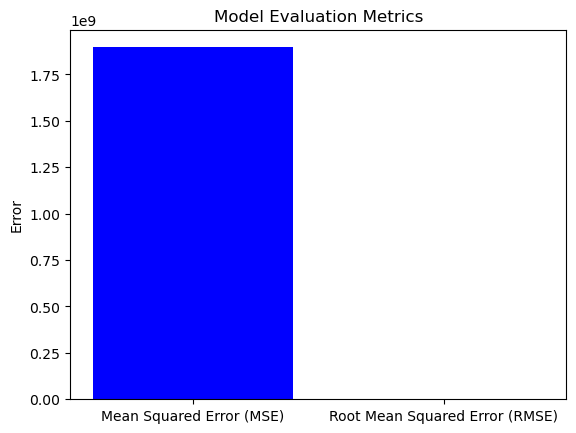

In [16]:
metrics = ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)']
values = [mse, rmse]

plt.bar(metrics, values, color=['blue', 'green'])
plt.ylabel('Error')
plt.title('Model Evaluation Metrics')
plt.show()

In [17]:
# Let's make predictions on the test dataframe
test_predictions = lr_model.predict(test_df[['TotSqFt', 'TotBaths', 'BedroomAbvGr']])

In [18]:
# Create a dataframe for submission
predicted_df = pd.DataFrame({'Id': test_df['Id'], 'TotSqFt' : test_df['TotSqFt'], 'TotBaths' : test_df['TotBaths'] , 'BedroomAbvGr' : test_df['BedroomAbvGr'], 'SalePrice': test_predictions})
predicted_df

,Id,TotSqFt,TotBaths,BedroomAbvGr,SalePrice
0,1461,2768.0,1.0,2,138400.752609
1,1462,3399.0,2.0,3,179053.938121
2,1463,3285.0,3.0,3,192584.816162
3,1464,3396.0,3.0,3,198296.344697
4,1465,3292.0,2.0,2,184760.055923
...,...,...,...,...,...
1454,2915,1638.0,2.0,3,88441.309742
1455,2916,1948.0,2.0,3,104392.425470
1456,2917,3498.0,2.0,4,172936.178623
1457,2918,1994.0,2.0,3,106759.365223


In [19]:
# Let's save the submission dataframe to a CSV file
predicted_df.to_csv('HousePricesPred.csv', index=False)

### The predictions on house prices have been made with a deviation of 43545 and stored in a separate CSV file.

In [20]:
PRED=pd.read_csv('HousePricesPred.csv')
PRED

,Id,TotSqFt,TotBaths,BedroomAbvGr,SalePrice
0,1461,2768.0,1.0,2,138400.752609
1,1462,3399.0,2.0,3,179053.938121
2,1463,3285.0,3.0,3,192584.816162
3,1464,3396.0,3.0,3,198296.344697
4,1465,3292.0,2.0,2,184760.055923
...,...,...,...,...,...
1454,2915,1638.0,2.0,3,88441.309742
1455,2916,1948.0,2.0,3,104392.425470
1456,2917,3498.0,2.0,4,172936.178623
1457,2918,1994.0,2.0,3,106759.365223


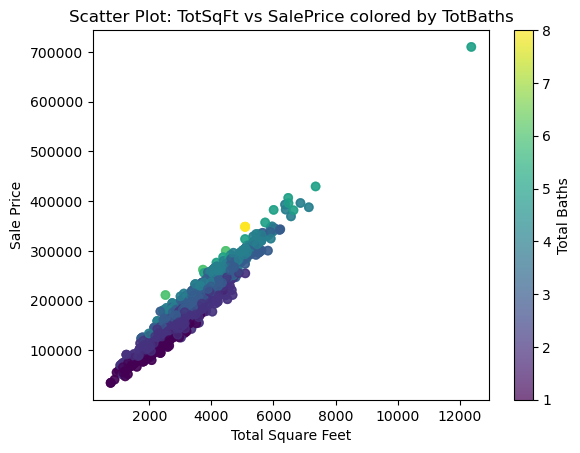

In [21]:
plt.scatter(PRED['TotSqFt'], PRED['SalePrice'], c=PRED['TotBaths'], cmap='viridis', alpha=0.7)
plt.scatter(PRED['TotSqFt'], PRED['SalePrice'], c=PRED['TotBaths'], cmap='viridis', alpha=0.7)
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.title('Scatter Plot: TotSqFt vs SalePrice colored by TotBaths')
plt.colorbar(label='Total Baths')
plt.show()
